In [1]:
from functions.load_training_data import training_samples, load_regression_samples, load_rescaled_samples
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time

# Load Training Samples

Loading images and mask collections...
	Loading complete.
Creating mask composites...
	Composites complete.
Rescaling Data...
	Data has been rescaled.
Cropping Rescaled Data...
Done!
Data loaded in 1 minutes, 12.61 seconds


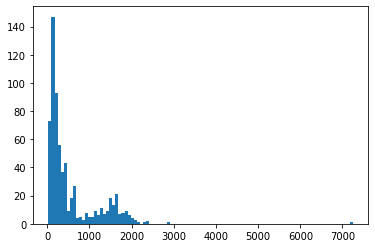

In [3]:
start = time.time()
cropped_sizes, cropped_masks, cropped_imgs = load_rescaled_samples(10000)
end = time.time() - start
print("Data loaded in %d minutes, %.2f seconds" %((end // 60), (end % 60)))

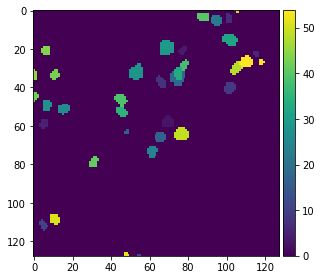

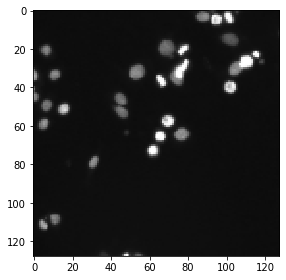

In [19]:
io.imshow(cropped_masks[200]); plt.figure()
io.imshow(cropped_imgs[200])

# Configure GPU

In [7]:
from functions.tf_config import config_gpu

config_gpu(2, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 2


# Configure Model

In [8]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=(128, 128, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(32, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [9]:
start = time.time()
img_tensor = tf.convert_to_tensor(list(cropped_imgs))
end = time.time() - start
print("Tensor created in %d minutes, %.2f seconds" %((end // 60), (end % 60)))

Tensor created in 3 minutes, 16.83 seconds


In [10]:
img_tensor.shape

TensorShape([10000, 128, 128, 3])

In [12]:
loss_fn = keras.losses.MeanAbsoluteError(
                reduction="auto", name="mean_absolute_error")

In [13]:
opt = keras.optimizers.Adam(learning_rate=.01)
model.compile(optimizer=opt, loss=loss_fn, metrics="mean_absolute_error")

In [18]:
size_tensor = tf.convert_to_tensor(list(cropped_sizes))
model.fit(img_tensor, size_tensor, epochs=5, verbose=1)

Epoch 1/5
313/313 [==============================] - 2s 6ms/step - loss: 41.8023 - mean_absolute_error: 41.8023
Epoch 2/5
313/313 [==============================] - 2s 7ms/step - loss: 41.8734 - mean_absolute_error: 41.8734
Epoch 3/5
313/313 [==============================] - 2s 6ms/step - loss: 41.3922 - mean_absolute_error: 41.3922
Epoch 4/5
313/313 [==============================] - 2s 6ms/step - loss: 41.8041 - mean_absolute_error: 41.8041
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 38.7289 - mean_absolute_error: 38.7289
